In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load shop profile data
_combined_features = pd.read_csv('../data/Shop_Features.csv')
shop_profile_data = pd.read_csv('../data/Store-info.csv')
shop_profile_data = shop_profile_data[['shop_id', 'shop_profile']]

# Remove rows with null values in the shop_profile column
shop_profile_data = shop_profile_data.dropna(subset=['shop_profile'])

# Define a mapping from the categorical shop_profile values to integers
shop_profile_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

# Replace the shop_profile values with their corresponding integer values
shop_profile_data['shop_profile'] = shop_profile_data['shop_profile'].replace(shop_profile_mapping)

# Merge the cleaned shop profile data with the combined_features DataFrame
combined_features_with_profile = _combined_features.merge(shop_profile_data, on='shop_id', how='inner')

In [51]:
combined_features_with_profile.head()

,shop_id,total_sales,total_quantity_sold,mean_item_price,total_bills,total_transactions,total_items,total_customers,weekday_transactions,weekend_transactions,shop_area_sq_ft,shop_profile
0,SHOP001,628055,2996,196.243448,1351,1717,35,982,1108,609,580,1
1,SHOP003,1152090,5601,188.318777,2558,3206,35,1874,2133,1073,810,3
2,SHOP004,1120455,5455,189.714332,2370,3063,35,1600,1954,1109,516,1
3,SHOP005,1229570,6031,191.287073,2779,3574,35,1940,2259,1315,617,1
4,SHOP006,1147440,5577,190.659012,2498,3179,35,1795,2087,1092,676,1


In [52]:
combined_features_with_profile.describe()

,total_sales,total_quantity_sold,mean_item_price,total_bills,total_transactions,total_items,total_customers,weekday_transactions,weekend_transactions,shop_area_sq_ft,shop_profile
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,1.217190e+06,5899.990000,189.480944,2602.870000,3348.660000,34.740000,1829.38000,2113.780000,1234.880000,628.290000,1.950000
std,3.859388e+05,1802.915195,9.536367,771.428292,1009.459263,1.185945,532.20044,630.512483,391.012782,128.999201,0.821123
min,8.083500e+04,415.000000,141.021843,186.000000,247.000000,31.000000,176.00000,114.000000,133.000000,298.000000,1.000000
25%,9.791750e+05,4789.250000,184.782023,2171.750000,2768.500000,35.000000,1457.75000,1725.250000,986.000000,573.250000,1.000000
50%,1.199950e+06,5844.500000,189.723025,2539.500000,3285.500000,35.000000,1824.00000,2126.500000,1188.500000,617.000000,2.000000
75%,1.409189e+06,6983.750000,195.185783,3036.500000,3920.000000,35.000000,2172.50000,2510.000000,1455.000000,676.000000,3.000000
max,2.206555e+06,9876.000000,209.770182,4446.000000,5672.000000,36.000000,2976.00000,3492.000000,2180.000000,1077.000000,3.000000


# The total_items feature didn't provide any valuable information so we don't consider it anymore

In [53]:
weak_features = ['shop_id', 'total_items', 'shop_profile', 'mean_item_price', 'shop_area_sq_ft']
feature_cols = [ col for col in combined_features_with_profile.columns if not col in weak_features ]
print("No of features to compare:", len(feature_cols))

No of features to compare: 7


In [54]:
# combined_features_with_profile['average_sale_per_transaction'] = combined_features_with_profile['total_sales'] / combined_features_with_profile['total_transactions']
combined_features_with_profile['product_customer_per_transaction'] = combined_features_with_profile['total_customers'] * combined_features_with_profile['total_transactions']
feature_cols.append('product_customer_per_transaction')
combined_features_with_profile['bills_per_customer'] = combined_features_with_profile['total_bills'] / combined_features_with_profile['total_customers']
feature_cols.append('bills_per_customer')

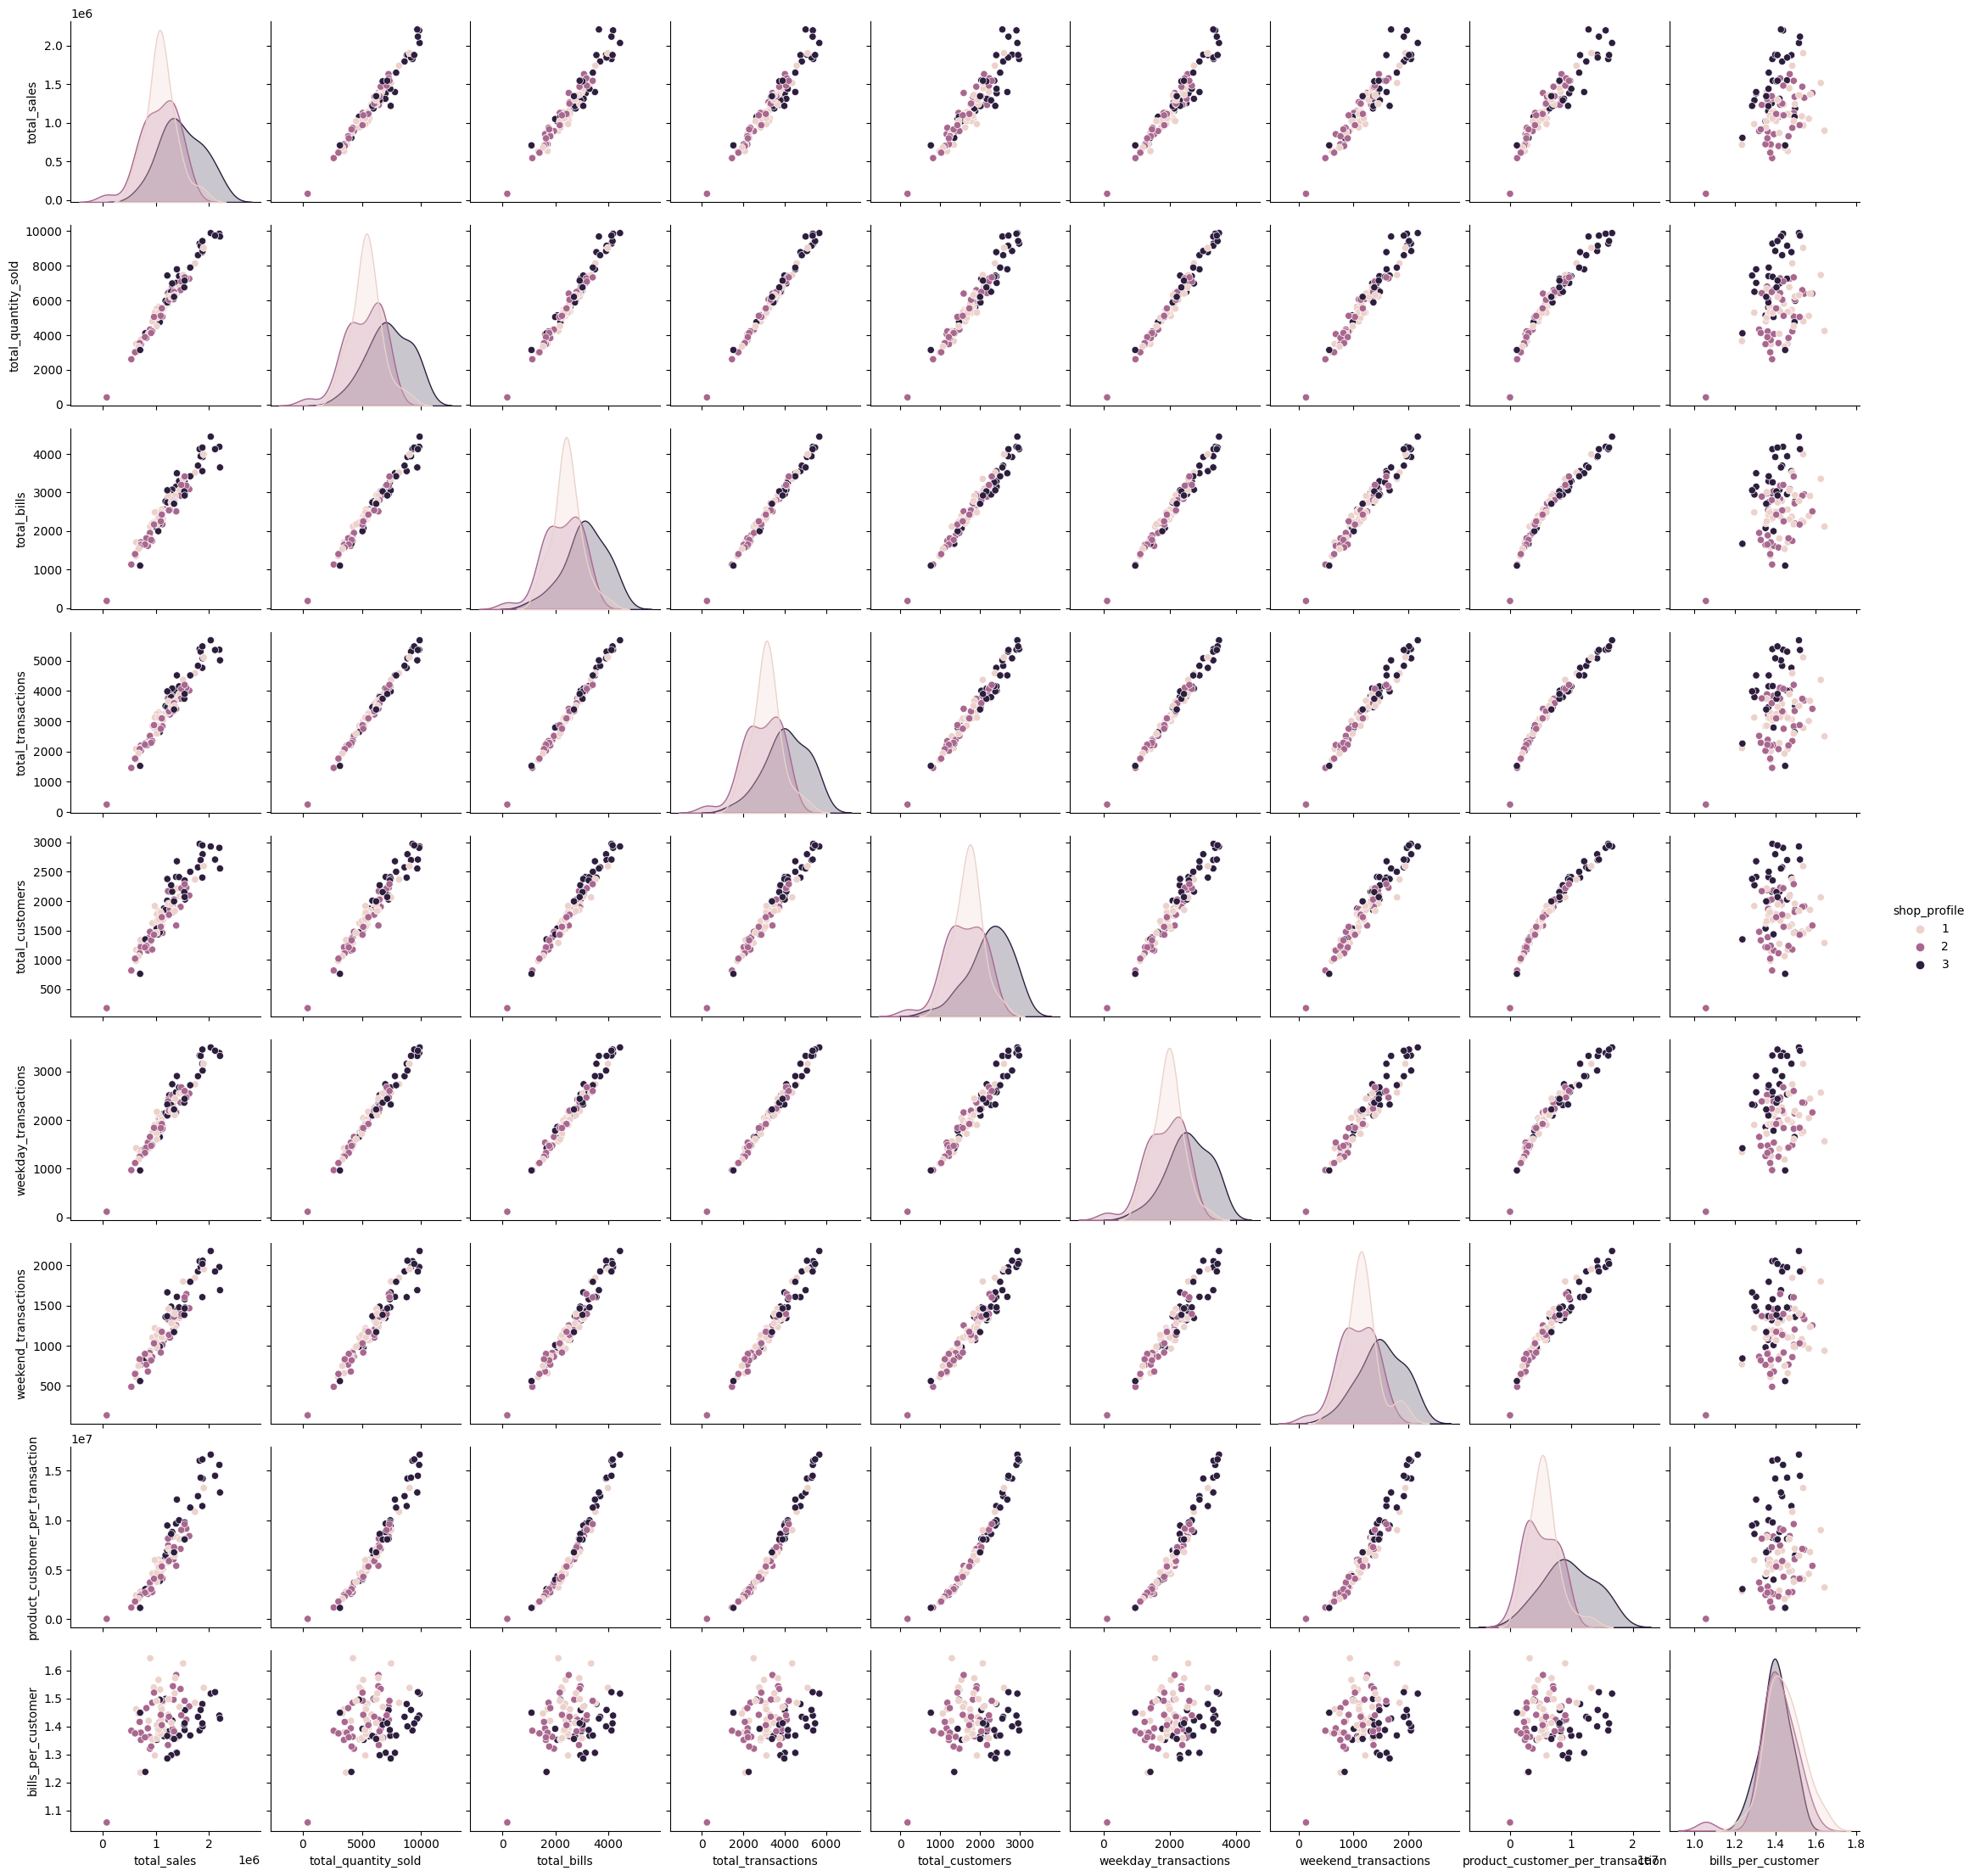

In [55]:
sns.pairplot(combined_features_with_profile, vars=feature_cols, hue='shop_profile')